Import the needed files and libraries

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Saving Times New Roman.ttf to Times New Roman.ttf
Saving neg_dss.tsv to neg_dss.tsv
Saving pos_dss.tsv to pos_dss.tsv


Check that the files were imported right

In [2]:
uploaded.keys()

dict_keys(['Times New Roman.ttf', 'neg_dss.tsv', 'pos_dss.tsv'])

Read both TSVs as dataframes

In [3]:
neg_labels = ["UniProt_ID", "Species", "Kingdom", "Seq_Length", "TransM_Helix_90", "T(1-5)/B(0)"]
pos_labels = ["UniProt_ID", "Species", "Kingdom", "Seq_Length", "Cleavage", "T(1-5)/B(0)"]
unf_neg = pd.read_csv("neg_dss.tsv", sep = "\t", names = neg_labels)
unf_pos = pd.read_csv("pos_dss.tsv", sep = "\t",  names = pos_labels)

neg = unf_neg[["UniProt_ID", "Species", "Kingdom", "Seq_Length"]]
pos = unf_pos[["UniProt_ID", "Species", "Kingdom", "Seq_Length","Cleavage"]]

neg = neg.assign(Cleavage=0)
pos = pos.assign(TransM_Helix_90="NIL")

neg = pd.concat([neg, unf_neg["TransM_Helix_90"]],axis=1)

neg = pd.concat([neg, unf_neg["T(1-5)/B(0)"]], axis=1)
pos = pd.concat([pos, unf_pos["T(1-5)/B(0)"]], axis=1)

#neg = neg.assign(SP=0)
#pos = pos.assign(SP=1)

print(neg.head(5))
print(pos.head(5))

  UniProt_ID                                            Species  Kingdom  \
0     P80304                                  Sepia officinalis  Metazoa   
1     Q92574                                       Homo sapiens  Metazoa   
2     Q99188  Saccharomyces cerevisiae (strain ATCC 204508 /...    Fungi   
3     Q09849  Schizosaccharomyces pombe (strain 972 / ATCC 2...    Fungi   
4     P00560  Saccharomyces cerevisiae (strain ATCC 204508 /...    Fungi   

   Seq_Length  Cleavage  TransM_Helix_90  T(1-5)/B(0)  
0          51         0            False            1  
1        1164         0            False            1  
2         309         0            False            1  
3         424         0            False            1  
4         416         0            False            1  
  UniProt_ID          Species  Kingdom  Seq_Length  Cleavage TransM_Helix_90  \
0     P52798     Homo sapiens  Metazoa         201        25             NIL   
1     P17948     Homo sapiens  Metazoa        1

Edit the "Kingdom" row, to change all the kingdoms that are not "Metazoa", "Fungi" and "Viridiplantae" to "Others"

In [4]:
keep_labels = ["Metazoa", "Viridiplantae", "Fungi"]

for index, row in neg.iterrows():
    if row["Kingdom"] not in keep_labels:
        neg.at[index, "Kingdom"] = "Other"

for index, row in pos.iterrows():
    if row["Kingdom"] not in keep_labels:
        pos.at[index, "Kingdom"] = "Other"

data = pd.concat([pos, neg])

print(data.head(5))
print(data.tail(5))

data.to_csv("data.tsv", sep = "\t", index=False, header=True)

  UniProt_ID          Species  Kingdom  Seq_Length  Cleavage TransM_Helix_90  \
0     P52798     Homo sapiens  Metazoa         201        25             NIL   
1     P17948     Homo sapiens  Metazoa        1338        26             NIL   
2     Q8WWA0     Homo sapiens  Metazoa         313        18             NIL   
3     O75629     Homo sapiens  Metazoa         220        31             NIL   
4     P19069  Cavia porcellus  Metazoa        1742        19             NIL   

   T(1-5)/B(0)  
0            1  
1            1  
2            1  
3            1  
4            1  
      UniProt_ID                                            Species  Kingdom  \
8929      P90838                             Caenorhabditis elegans  Metazoa   
8930      Q8K4J6                                       Mus musculus  Metazoa   
8931  A0A7U2QXY7  Aspergillus flavus (strain ATCC 200026 / FGSC ...    Fungi   
8932      Q9BQL6                                       Homo sapiens  Metazoa   
8933      P30803 

In [5]:
print((neg['Kingdom'] == 'Other').value_counts())

Kingdom
False    8766
True      168
Name: count, dtype: int64


In [6]:
print((pos['Kingdom'] == 'Other').value_counts())

Kingdom
False    1065
True       28
Name: count, dtype: int64


In [7]:
print((data['Kingdom'] == 'Other').value_counts())

Kingdom
False    9831
True      196
Name: count, dtype: int64


We need to make subdataframes for the plots.

In [8]:
t_neg = neg[(neg["T(1-5)/B(0)"] != 0)]
t_pos = pos[(pos["T(1-5)/B(0)"] != 0)]
b_neg = neg[(neg["T(1-5)/B(0)"] == 0)]
b_pos = pos[(pos["T(1-5)/B(0)"] == 0)]

t = data[(data["T(1-5)/B(0)"] != 0)]
b = data[(data["T(1-5)/B(0)"] == 0)]

Setting the theme in Seaborn

In [9]:
sns.set_theme()
sns.set_theme(
context='notebook',
style='whitegrid',
palette='pastel',
font='Times New Roman',
font_scale=1,
color_codes=True,
rc={"font.family": ["Times New Roman", "Times", "Times Roman", "serif"]}
)

font_path = list(uploaded.keys())[0]
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'Times New Roman'

**First Plots. Taxonomic distributions**

**Kingdom** He wants training and benchmarking together, quindi, 2 plots.

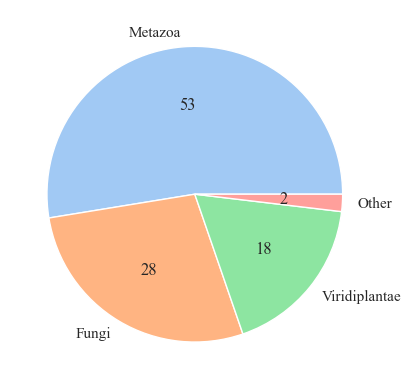

In [10]:
neg_kingdom = neg['Kingdom'].value_counts()
plt.pie(neg_kingdom, labels=neg_kingdom.index, autopct='%.0f')
plt.show()

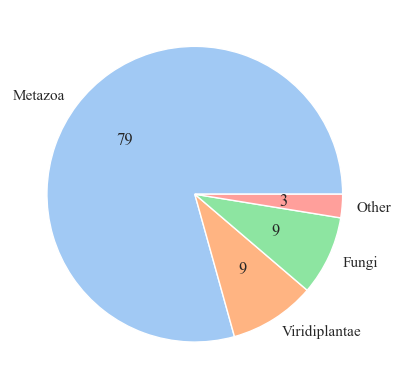

In [11]:
pos_kingdom = pos['Kingdom'].value_counts()
plt.pie(pos_kingdom, labels=pos_kingdom.index, autopct='%.0f')
plt.show()

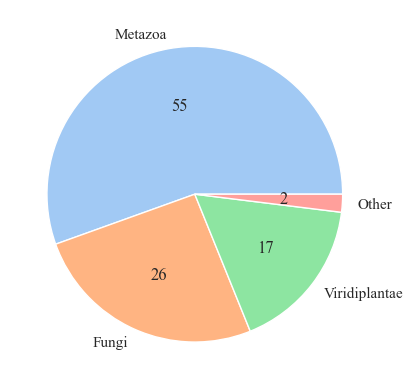

In [12]:
data_kingdom = data['Kingdom'].value_counts()
plt.pie(data_kingdom, labels=data_kingdom.index, autopct='%.0f')
plt.show()

**Species plots**

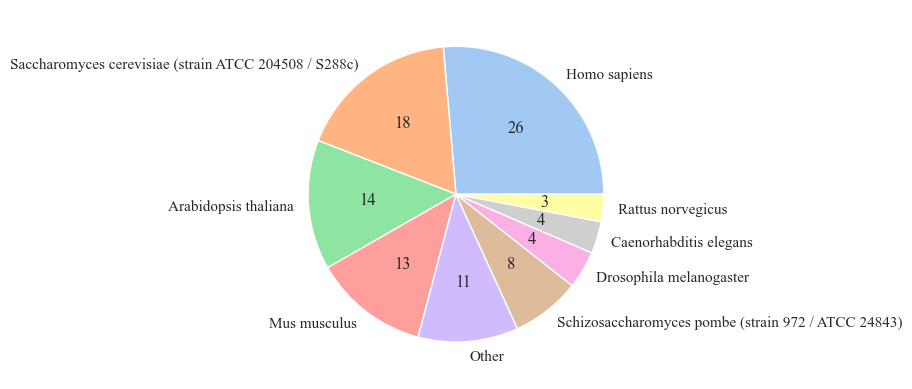

In [13]:
keep_labels = ["Homo sapiens", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Arabidopsis thaliana", "Mus musculus", "Schizosaccharomyces pombe (strain 972 / ATCC 24843)", "Drosophila melanogaster", "Caenorhabditis elegans", "Rattus norvegicus"]

for index, row in neg.iterrows():
    if row["Species"] not in keep_labels:
        neg.at[index, "Species"] = "Other"

neg_species = neg['Species'].value_counts()
plt.pie(neg_species, labels=neg_species.index, autopct='%.0f')
plt.show()

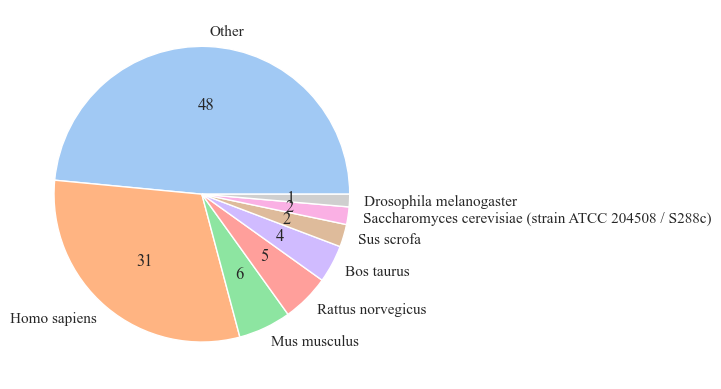

In [14]:
keep_labels = ["Homo sapiens", "Mus musculus", "Rattus norvegicus", "Bos taurus", "Sus scrofa", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Drosophila melanogaster"]

for index, row in pos.iterrows():
    if row["Species"] not in keep_labels:
        pos.at[index, "Species"] = "Other"

pos_species = pos['Species'].value_counts()
plt.pie(pos_species, labels=pos_species.index, autopct='%.0f')
plt.show()

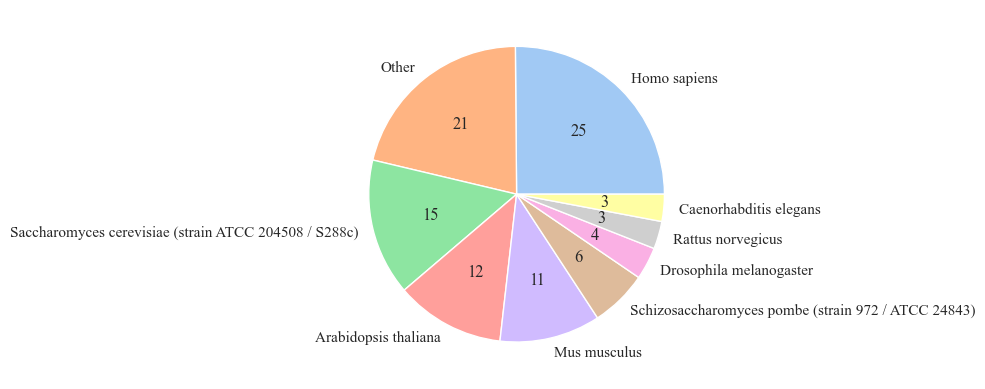

In [15]:
keep_labels = ["Homo sapiens", "Caenorhabditis elegans", "Schizosaccharomyces pombe (strain 972 / ATCC 24843)", "Arabidopsis thaliana", "Mus musculus", "Rattus norvegicus", "Saccharomyces cerevisiae (strain ATCC 204508 / S288c)", "Drosophila melanogaster"]

for index, row in data.iterrows():
    if row["Species"] not in keep_labels:
        data.at[index, "Species"] = "Other"

data_species = data['Species'].value_counts()
plt.pie(data_species, labels=data_species.index, autopct='%.0f')
plt.show()

**Second plots. Protein length**

**Distribution**

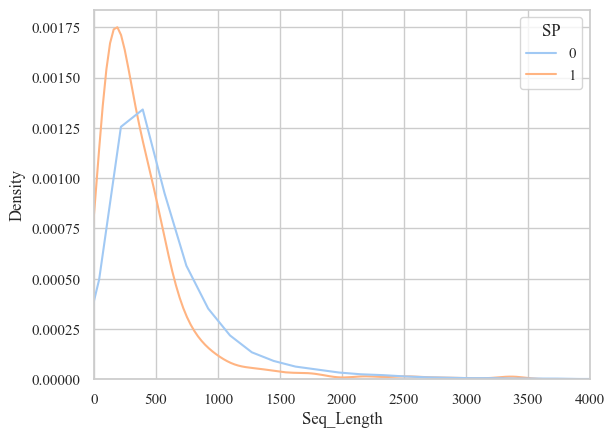

/tmp/ipython-input-2688422675.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'T' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pos_1.at[index, "T(1-5)/B(0)"] = "T"
/tmp/ipython-input-2688422675.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'T' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  neg_0.at[index, "T(1-5)/B(0)"] = "T"


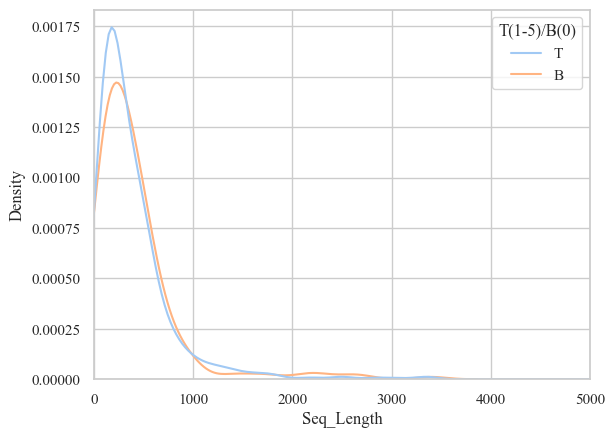

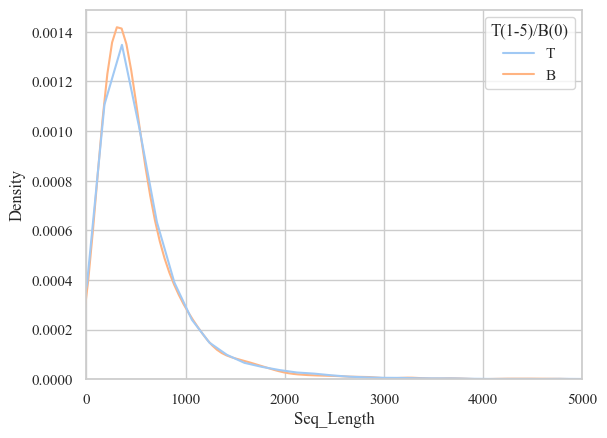

In [16]:
neg_0 = neg.assign(SP=0)
pos_1 = pos.assign(SP=1)

data_SP = pd.concat([pos_1, neg_0])

# By pos-neg.
a = sns.kdeplot(
data=data_SP,
x="Seq_Length",
hue="SP",
common_norm=False
)

a.set(xlim=(0,4000))
plt.show()

# Labeling bench and training.
for index, row in pos_1.iterrows():
    if row["T(1-5)/B(0)"] != 0:
        pos_1.at[index, "T(1-5)/B(0)"] = "T"
    else:
        pos_1.at[index, "T(1-5)/B(0)"] = "B"

for index, row in neg_0.iterrows():
    if row["T(1-5)/B(0)"] != 0:
        neg_0.at[index, "T(1-5)/B(0)"] = "T"
    else:
        neg_0.at[index, "T(1-5)/B(0)"] = "B"

# By bench and training, pos and neg.
b = sns.kdeplot(
data=pos_1,
x="Seq_Length",
hue="T(1-5)/B(0)",
common_norm=False
)
b.set(xlim=(0,5000))
plt.show()

c = sns.kdeplot(
data=neg_0,
x="Seq_Length",
hue="T(1-5)/B(0)",
common_norm=False
)
c.set(xlim=(0,5000))
plt.show()

**Boxplots**

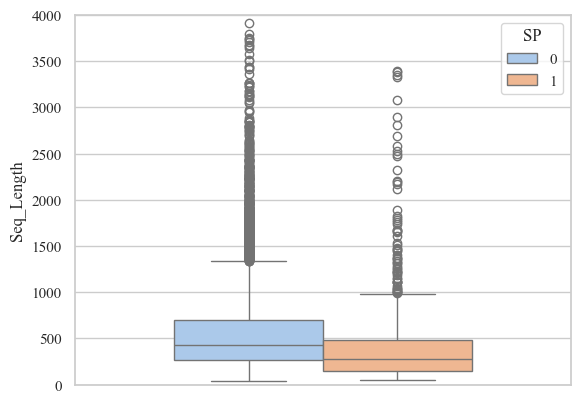

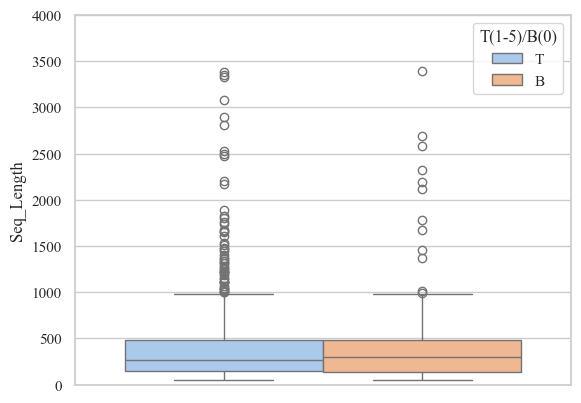

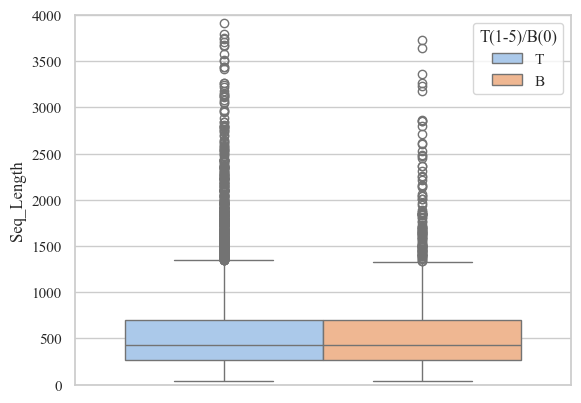

In [17]:
# By pos-neg.
a = sns.boxplot(
  data=data_SP,
  y="Seq_Length",
  hue="SP",
  width=0.6,
  dodge=True
)
a.set(ylim=(0,4000))
plt.show()

# By bench and training, pos and neg.
b = sns.boxplot(
data=pos_1,
y="Seq_Length",
hue="T(1-5)/B(0)"
)
b.set(ylim=(0,4000))
plt.show()

c = sns.boxplot(
data=neg_0,
y="Seq_Length",
hue="T(1-5)/B(0)"
)
c.set(ylim=(0,4000))
plt.show()

**Histograms**

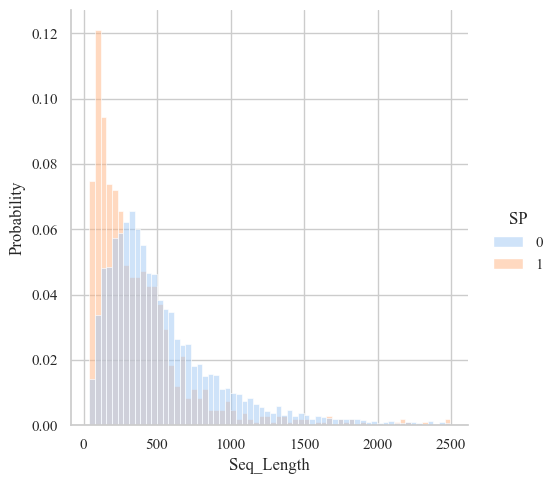

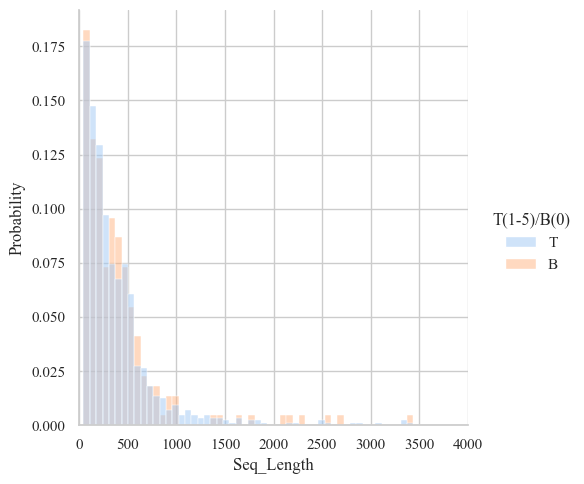

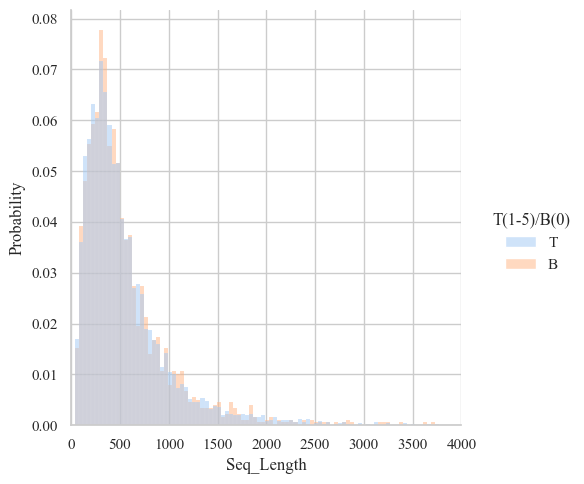

In [18]:
# By pos-neg.
a = sns.displot(
data = data_SP[data_SP["Seq_Length"]<=2500],
x = "Seq_Length",
hue = "SP",
common_norm = False,
stat = "probability"
)

#a.set(xlim=(0,3000), ylim=(0,100))
plt.show()

# By bench and training, pos and neg.
b = sns.displot(
data=pos_1,
x="Seq_Length",
hue="T(1-5)/B(0)",
common_norm = False,
stat="probability"
)
b.set(xlim=(0,4000))
plt.show()

c = sns.displot(
data=neg_0,
x="Seq_Length",
hue="T(1-5)/B(0)",
common_norm = False,
stat="probability"
)
c.set(xlim=(0,4000))
plt.show()

**Third Plots. SP length**

**Distribution**

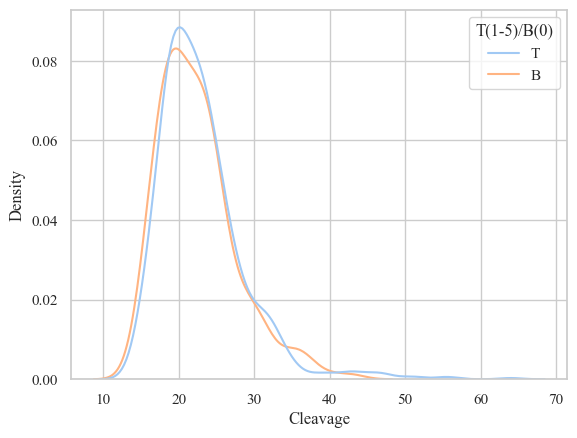

In [19]:
a = sns.kdeplot(
data=pos_1,
x="Cleavage",
hue="T(1-5)/B(0)",
common_norm=False
)

plt.show()

**Boxplot**

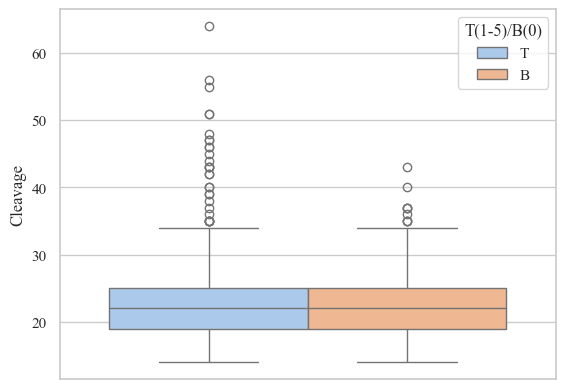

In [20]:
a = sns.boxplot(
data=pos_1,
y="Cleavage",
hue="T(1-5)/B(0)"
)

plt.show()

**Histogram**

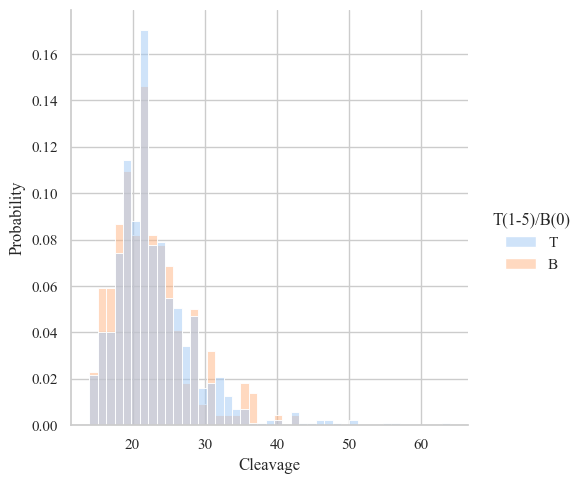

In [21]:
a = sns.displot(
data=pos_1,
x="Cleavage",
hue="T(1-5)/B(0)",
stat="probability",
common_norm=False
)

plt.show()

In [22]:
print(pos_1.head(5))
print(pos_1.tail(5))

  UniProt_ID       Species  Kingdom  Seq_Length  Cleavage TransM_Helix_90  \
0     P52798  Homo sapiens  Metazoa         201        25             NIL   
1     P17948  Homo sapiens  Metazoa        1338        26             NIL   
2     Q8WWA0  Homo sapiens  Metazoa         313        18             NIL   
3     O75629  Homo sapiens  Metazoa         220        31             NIL   
4     P19069         Other  Metazoa        1742        19             NIL   

  T(1-5)/B(0)  SP  
0           T   1  
1           T   1  
2           T   1  
3           T   1  
4           T   1  
     UniProt_ID       Species  Kingdom  Seq_Length  Cleavage TransM_Helix_90  \
1088     Q52085         Other    Other         320        19             NIL   
1089     P41271  Homo sapiens  Metazoa         181        16             NIL   
1090     Q96DR8  Homo sapiens  Metazoa          90        20             NIL   
1091     Q1XG90         Other  Metazoa         135        18             NIL   
1092     P05560  

**Fourth plots. Sequence logos of SP cleavage sites**

**Fifth plots. Comparative amino-acid composition of SPs against some background distribution**